In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings as ws
ws.filterwarnings("ignore")

In [3]:
df = pd.read_csv("zoo_dataset.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
# split dataset
X = df.drop(["class_type", "animal_name"], axis = 1)
y = df["class_type"]

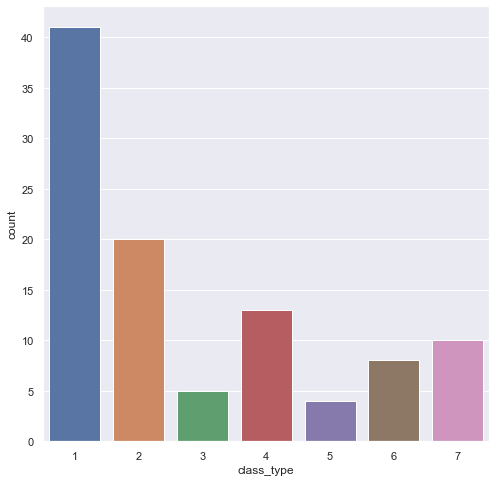

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (8,8))
sns.set()
sns.countplot(y)
plt.show()

#  imbalanced Classes

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,  stratify = y, test_size = 0.2)

In [11]:
# Fitting Model

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Fitting the Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs",random_state=42, C=1.0)

In [17]:
# Fitting KFold 
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [19]:
cv_score = cross_val_score(lr, X_train, y_train, cv = cv, n_jobs=-1, verbose=1, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.2s finished


In [26]:
print("Cross validation Accuracy is %.2f" %np.mean(cv_score*100))

Cross validation Accuracy is 94.26


In [27]:
# Fitting the Logistic regression

In [28]:
logreg = LogisticRegression(solver="lbfgs",random_state=42, C=1.0)

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predict = logreg.predict(X_test)

In [31]:
conf = confusion_matrix(y_test, y_predict)

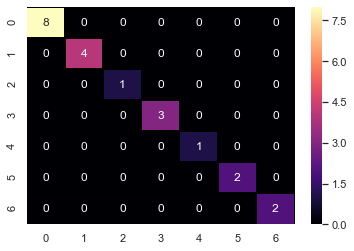

In [33]:
sns.heatmap(conf, annot=True, fmt =".2g", linewidths=0.5, linecolor="black", cmap="magma")
plt.show()